<a href="https://colab.research.google.com/github/sasireddyvari/Complete_Deep_Learning-Computer_Vision/blob/master/Use%20Case%3A%20MICR_Extraction_From_Bank_Checks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recognize text from images:**

In [ ]:
! apt install tesseract-ocr # Advanced Package Tool
! apt install libtesseract-dev # ! -- It tells the notebook cell that this line is not a Python code, its a command line script.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
!pip install pytesseract

In [ ]:
!ls -alrt /usr/bin/tesseract # testing in that directory tesseract is installed or not

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract


In [ ]:
try:
  from PIL import Image
except ImportError:
  import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
def ocr_img_text(filepath):
  """
  This function will handle the core OCR processing of images.
  """
  text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
  return print(text)

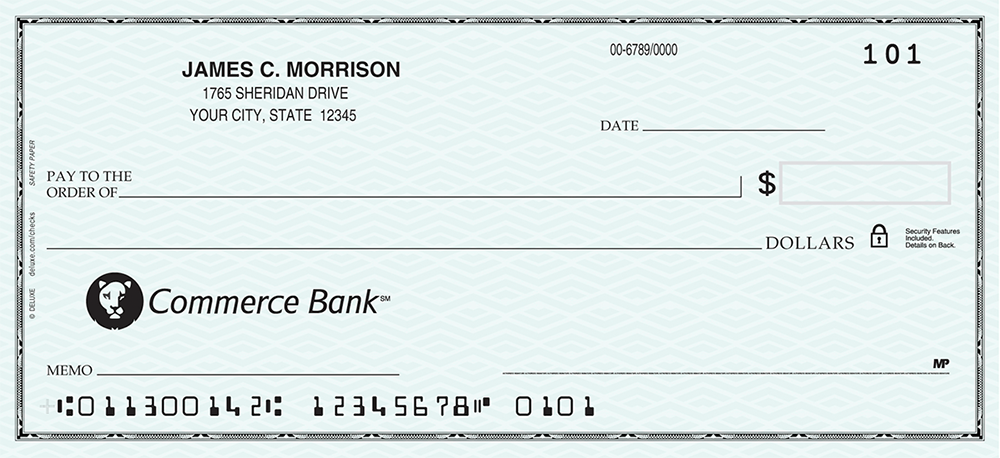

In [ ]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Projects/bank-check-ocr-master/bank-check-ocr-master/example_check.png')
img

Extracting text by calling OCR funnction which we created

In [ ]:
ocr_img_text('/content/drive/MyDrive/Colab Notebooks/Projects/bank-check-ocr-master/bank-check-ocr-master/example_check.png')

 

 

JAMES C. MORRISON
1765 SHERIDAN DRIVE

YOUR CITY, STATE 12345 DATE

§ PAY TOTHE
ORDER OF. J $

 

segree HE
DOLLARS. a

 

e Commerce Bank

MEMO.
WO’IOO’L ee 22ILSB?AM

 

 



# As You see above **OCR** basically used to extract all the well written text and compares with its inbuilt vocabulary. It may not always gets the correct ouput due to its limitations since when the complexity image increases, it cannot handle as MICR and garbage is also extracted aprat from the well written text as seen above. Hence we have **Open Source Computer Vision Library(OpenCV)**
# Conventional OCR engines fail to remove noises such as black spaces or garbage values which leads to uncertainties in output

- First part : Check No
- Next three Digits : Code where that bank is
- Next three : Bank Code
- Next three : Branch Code
- Next : RBI Code 
- Next : Transaction No

In [ ]:
import cv2
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata # micr font plugin

--2021-01-30 14:00:49--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.03s   

2021-01-30 14:00:49 (5.15 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [ ]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/ # moving the font to the folder into the specified

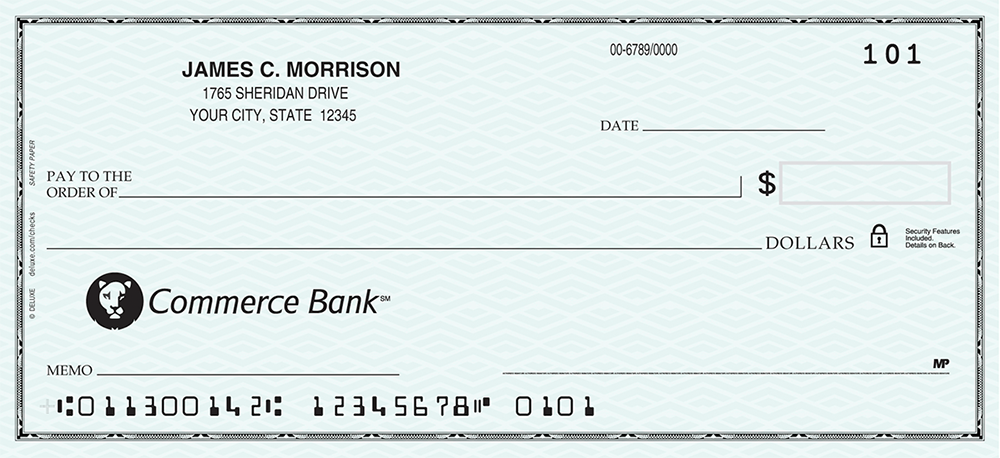

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Projects/bank-check-ocr-master/bank-check-ocr-master/example_check.png')
image

In [ ]:
check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
#check_img

In [ ]:
micr_img = check_img[384:422, 40:600]
check_img.shape

(458, 1000, 3)

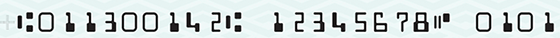

In [ ]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

In [ ]:
print(pytesseract.image_to_string(micr_img,lang = 'mcr'))

a011300142a 12345678c 0101



![alt text](https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/readmeImages/micrTable.png)

In [ ]:
s=pytesseract.image_to_string(micr_img,lang = 'mcr')

In [ ]:
s[1:10]

'011300142'

In [ ]:
# Function to call it and use
def micr_extract(filepath):
  check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
  res = pytesseract.image_to_string(micr_img,lang = 'mcr')
  return res[:-2]

In [ ]:
micr_extract('/content/drive/MyDrive/Colab Notebooks/Projects/bank-check-ocr-master/bank-check-ocr-master/example_check.png')

'a011300142a 12345678c 0101'